In [1]:
from random import randint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import cv2
from sklearn import metrics

# Data Creation

In [2]:
blank_df = pd.read_csv(r'C:\Users\dso1222\Documents\TextRecognition\Forms\KNN\BlankClaimFormatted.csv')

In [3]:
blank_df = pd.read_csv(r'C:\Users\dso1222\Documents\TextRecognition\Forms\KNN\BlankClaimFormatted.csv')
trainData = []
trainLabel = []
for index, row in blank_df.iterrows():
    height = int(row['ymax'])-int(row['ymin'])
    for count in range(3000):
        #percent offset
        offset = randint(-(int(height/2)),int(height/2))
        y = int(row['ymin'])+offset
        if y < 0:
            y = 0
        else:
            pass
        trainData.append([int(row['xmin']), y])
        trainLabel.append(row['name'])

In [4]:
trainData

[[57, 41],
 [57, 87],
 [57, 86],
 [57, 87],
 [57, 35],
 [57, 19],
 [57, 61],
 [57, 85],
 [57, 0],
 [57, 65],
 [57, 6],
 [57, 71],
 [57, 90],
 [57, 94],
 [57, 42],
 [57, 80],
 [57, 8],
 [57, 0],
 [57, 45],
 [57, 93],
 [57, 44],
 [57, 68],
 [57, 76],
 [57, 91],
 [57, 73],
 [57, 34],
 [57, 36],
 [57, 41],
 [57, 35],
 [57, 70],
 [57, 59],
 [57, 17],
 [57, 67],
 [57, 51],
 [57, 22],
 [57, 31],
 [57, 13],
 [57, 32],
 [57, 97],
 [57, 85],
 [57, 16],
 [57, 16],
 [57, 44],
 [57, 1],
 [57, 50],
 [57, 86],
 [57, 68],
 [57, 18],
 [57, 1],
 [57, 98],
 [57, 33],
 [57, 24],
 [57, 52],
 [57, 38],
 [57, 48],
 [57, 48],
 [57, 55],
 [57, 84],
 [57, 71],
 [57, 4],
 [57, 92],
 [57, 24],
 [57, 66],
 [57, 8],
 [57, 78],
 [57, 83],
 [57, 40],
 [57, 46],
 [57, 48],
 [57, 51],
 [57, 76],
 [57, 29],
 [57, 58],
 [57, 62],
 [57, 49],
 [57, 65],
 [57, 69],
 [57, 9],
 [57, 30],
 [57, 2],
 [57, 74],
 [57, 46],
 [57, 85],
 [57, 87],
 [57, 15],
 [57, 77],
 [57, 96],
 [57, 37],
 [57, 45],
 [57, 26],
 [57, 79],
 [57, 1],

# Test Train Split

In [5]:
data = np.array(trainData)
label = np.array(trainLabel)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2, random_state=4)

In [7]:
y_train.shape

(537600,)

# KNN Uniform Weight

In [8]:
k_range=[1,3,5,7,9,11,13,15]
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    print(k)

1
3
5
7
9
11
13
15


Text(0, 0.5, 'Test Acc')

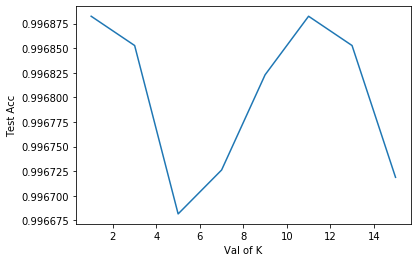

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Val of K')
plt.ylabel('Test Acc')

In [10]:
max(scores_list)

0.9968824404761905

In [11]:
k_range[scores_list.index(max(scores_list))]

1

# KNN Distance Weighted

In [12]:
k_range=[1,3,5,7,9,11,13,15]
scores2 = {}
scores_list2 = []

for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn2.fit(x_train, y_train)
    y_pred=knn2.predict(x_test)
    scores2[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list2.append(metrics.accuracy_score(y_test, y_pred))
    print(k)

1
3
5
7
9
11
13
15


Text(0, 0.5, 'Test Acc')

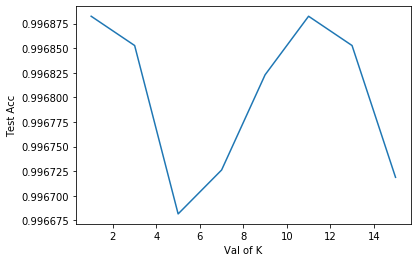

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list2)
plt.xlabel('Val of K')
plt.ylabel('Test Acc')

In [14]:
max(scores_list2)

0.9968824404761905

In [15]:
k_range[scores_list2.index(max(scores_list2))]

1

# Drawing a Point

In [8]:
img = cv2.imread(r'C:\Users\dso1222\Documents\TextRecognition\Forms\BlankClaimCropped.ppm')

In [14]:
img = cv2.imread(r'C:\Users\dso1222\Documents\TextRecognition\Forms\KNN\BlankClaim.ppm')
indices0 = [i for i, x in enumerate(trainLabel) if x == "4_InsuredName"]
indices1 = [i for i, x in enumerate(trainLabel) if x == "7_InsuredAddress"]
indices2 = [i for i, x in enumerate(trainLabel) if x == "7_InsuredAddress_City"]
indices3 = [i for i, x in enumerate(trainLabel) if x == "7_InsuredAddress_Zipcode"]
indices4 = [i for i, x in enumerate(trainLabel) if x == "3_PtDOB_Female"]
indices5 = [i for i, x in enumerate(trainLabel) if x == "1a_InsuredID"]
indices6 = [i for i, x in enumerate(trainLabel) if x == "6_PtRelationInsured_Other"]
zipcode_coords = []
indices = [indices0, indices1, indices2, indices3, indices4, indices5, indices6]
for index in indices:
    for item in index:
        xmin = trainData[item][0]
        ymin = trainData[item][1]
        zipcode_coords.append(trainData[item])
        #adding two to increase the thickness of the dot
        img[ymin:(ymin+2), xmin:(xmin+2)] = (0, 0, 0)
cv2.imwrite(r'C:\Users\dso1222\Documents\TextRecognition\Forms\BlankClaimCropped.jpg',img)

True

In [13]:
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histogram